# **Predicting Credit Risks using Supervised Machine Learning**
This notebook explores the use of supervised machine learning algorithms to predict whether a loan will be defaulted or paid. 

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

#from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,precision_recall_curve,f1_score,classification_report,roc_curve,auc
from pandas.core.indexes.base import default_index
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import Booster 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from xgboost import DMatrix
from sklearn import metrics
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


###**Data Collection**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/application_data.csv')
data2 = pd.read_csv('/content/drive/MyDrive/age_stats_data.csv')
df = pd.merge(data,data2, on='application_id')

###**Data Cleaning**

In [ ]:
#find columns with more than 80% null values
def columns():
  lst=[]
  lst=df.columns
  row=df.shape[0]
  cols=[]
  [cols.append(i) for i in lst if df[i].isnull().sum()/row*100 > 80 ]
  return cols



In [ ]:
df=df.drop(columns(),axis=1)

In [ ]:
def drop_cols(col_names, df):
    # input: list of column names and a dataframe
    # output: same dataframe with columns dropped
    df = df.drop(col_names, axis=1)
    return df

#fill in missing values
def FillNull(df):
    for column in df:
        if df[column].dtype in ("int64", "float64"):
            df[column] = df[column].fillna(0)
        elif df[column].dtype == "object":
            df[column] = df[column].fillna(df[column].mode()[0])
    return df

def ToLowerCase(df):
    df = df.applymap(lambda s: s.lower() if type(s) == str else s)
    return df.sample(3)

In [ ]:
#drop unwanted cols
df=drop_cols(['app_count','device_price','application_id','loan_number','device','employer_name','banks_contacted','competitors_contacted','loan_senders','time_at_property','employer_name','time_at_current_address','state','bank','total_accounts','competitor_count','news_count','banking_count','time_at_employer'],df)

In [ ]:
FillNull(df)

,income,property_status,highest_education,loan_purpose,marital_status,employment_status,gender,num_applications,open_accounts_by_date,closed_accounts_by_date,...,max_debit,min_debit,insufficient_funds,succesful_payments,max_succesful_loan_payment,min_succesful_loan_payment,unsuccesful_payments,rejected_loans,max_loan_amount,age
0,50000.0,Family house,Graduate,medical,Single,Permanent,MALE,2.0,2.0,1.0,...,3000.0,20.0,0.0,1.0,2.400000e+03,2.400000e+03,2.0,0.0,1275.0,33
1,30000.0,Rented House,Secondary,other,Single,Permanent,MALE,12.0,1.0,1.0,...,23000.0,50.0,0.0,0.0,0.000000e+00,0.000000e+00,8.0,0.0,7026.0,24
2,50000.0,Rented House,Graduate,business,Married,Self-Employed,MALE,1.0,0.0,3.0,...,92940.0,30.0,0.0,3.0,2.020000e+17,2.000000e+02,0.0,0.0,28175.0,42
3,211000.0,Family house,Graduate,medical,Married,Permanent,FEMALE,42.0,4.0,15.0,...,255000.0,4.0,0.0,3.0,1.900000e+03,1.900000e+03,0.0,0.0,65000.0,30
4,198000.0,Rented House,Graduate,house,Widowed,Permanent,MALE,1.0,0.0,7.0,...,100000.0,1.0,0.0,2.0,2.020000e+17,2.020000e+17,0.0,0.0,18170.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27467,50000.0,Rented House,Graduate,education,Single,Student,MALE,7.0,0.0,2.0,...,31100.0,40.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,21
27468,300000.0,Rented House,Graduate,medical,Married,Permanent,MALE,2.0,4.0,0.0,...,100000.0,10.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,43
27469,106000.0,Rented House,Secondary,education,Married,Permanent,MALE,1.0,2.0,4.0,...,4000.0,50.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,43
27470,200000.0,Rented House,Graduate,business,Married,Permanent,MALE,2.0,0.0,1.0,...,1827316.0,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,42


In [ ]:
ToLowerCase(df)

,income,property_status,highest_education,loan_purpose,marital_status,employment_status,gender,num_applications,open_accounts_by_date,closed_accounts_by_date,...,max_debit,min_debit,insufficient_funds,succesful_payments,max_succesful_loan_payment,min_succesful_loan_payment,unsuccesful_payments,rejected_loans,max_loan_amount,age
11871,70000.0,rented house,graduate,other,married,permanent,male,1.0,0.0,1.0,...,50000.0,10.0,0.0,3.0,1900.0,1900.0,0.0,0.0,0.0,39
17630,61000.0,temporary,graduate,education,married,permanent,male,1.0,2.0,3.0,...,30000.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38
14651,50000.0,family house,graduate,education,single,student,male,7.0,0.0,1.0,...,28000.0,1.0,0.0,6.0,2000.0,2000.0,8.0,0.0,1150.0,36


###**Handling Outliers using IQR**

In [ ]:
def outliers(df,ft):
  q1=df[ft].quantile(0.05)
  q2=df[ft].quantile(0.95)
  iqr = q2-q1
  lower = q1 - 1.5 * iqr
  upper = q2 + 1.5 * iqr
  ls = df.index[ (df[ft]<lower) | (df[ft]>upper) ]
  return ls
  


In [ ]:
num_data = df.select_dtypes(include=['float64','int64'])
index_list=[]
#extract outliers for all columns
for feature in num_data:
       index_list.extend(outliers(df,feature))

In [ ]:
def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df
df = remove(df,index_list)

###**One hot encoding**

One-hot encoding is used to convert categorical variables into a format that can be readily used by machine learning algorithms.

The basic idea of one-hot encoding is to create new variables that take on values 0 and 1 to represent the original categorical values.

In [ ]:
def OneHotEncoding(df, column_names):
    df = pd.get_dummies(df, columns=column_names)
    return df

In [ ]:
column_names = list(df.select_dtypes(include=['object']).columns)
df = OneHotEncoding(df, column_names)

### **Scaling & Building Models**

In [ ]:
def split(x,y):
    target_data = 'defaulted'
    x = df.drop('defaulted',axis=1)
    robust_scaler = RobustScaler()
    x = robust_scaler.fit_transform(x) #rescales features to the same scale
    y=df[target_data]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    return  np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

In [ ]:
def balance_classes(x, y):
    sm = SMOTE(random_state=2)
    x_res, y_res = sm.fit_resample(x, y.ravel())
    return x_res, y_res


In [ ]:
def set_sets(x,y):
    x_train, x_test, y_train, y_test =  split(x,y)
    x_res, y_res = balance_classes(x_train, y_train)
    print("Number rows x_train dataset: ", x_train.shape)
    print("Number rows y_train dataset: ", y_train.shape)
    print("Number rows x_test dataset: ", x_test.shape)
    print("Number rows y_test dataset: ", y_test.shape)
    print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
    print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1))) 
    print('After OverSampling, the shape of x_res: {}'.format(x_res.shape))
    print('After OverSampling, the shape of y_res: {}'.format(y_res.shape))
    print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))
    print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
    
    return x_res, x_test, y_res, y_test

In [ ]:
#confusion matrix
def cmatrix (cm,labels=['paid','default']):
  df = pd.DataFrame(data=cm,index=labels,columns=labels)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  return df
 

### **Oversampling**

Target class is imbalanced as seen below

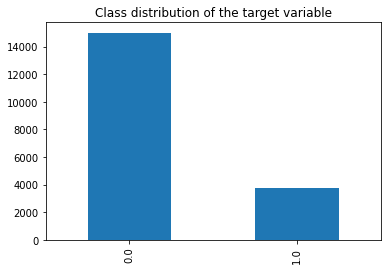

In [ ]:
value_counts = df["defaulted"].value_counts()
value_counts.plot(kind="bar", title="Class distribution of the target variable")

In [ ]:
x_res, x_test, y_res, y_test = set_sets(df, df['defaulted'])

Number rows x_train dataset:  (13139, 83)
Number rows y_train dataset:  (13139,)
Number rows x_test dataset:  (5631, 83)
Number rows y_test dataset:  (5631,)
Before OverSampling, counts of label '0': 10440
Before OverSampling, counts of label '1': 2699
After OverSampling, the shape of x_res: (20880, 83)
After OverSampling, the shape of y_res: (20880,)
After OverSampling, counts of label '0': 10440
After OverSampling, counts of label '1': 10440


###**Logistic Regression**

In [ ]:

def Performance(Model,y,x):
    target_names = ['paid', 'defaulted']
    # Perforamnce of the model
    print("Accuracy")
    print(accuracy_score(y,Model.predict(x).round()).round(4))
    print(" ")
    
    print('Classification Report:')
    print(classification_report(y,Model.predict(x).round()))
    print(" ")
    
    # print('Confusion Matrix')
    # cm = confusion_matrix(y,Model.predict(x).round())
    # cmatrix(cm)
    
    fpr, tpr, _ = roc_curve(y,Model.predict(x))
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.2f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
lr_grid = {    
            "dual" : [False],
            "max_iter" : [5000],
}

def build_lr_classifier(grid, cv, y, x):
    lr=LogisticRegression()
    grid_search = GridSearchCV(lr, grid, n_jobs=-1, cv=cv, verbose=10,scoring='roc_auc')
    grid_search.fit(x,y)
    return grid_search
    
lr_model = build_lr_classifier(lr_grid,5,y_res, x_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


The training performance of the model
Accuracy
0.6244
 
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.59      0.61     10440
         1.0       0.62      0.66      0.64     10440

    accuracy                           0.62     20880
   macro avg       0.63      0.62      0.62     20880
weighted avg       0.63      0.62      0.62     20880

 
the AUC is : 0.62


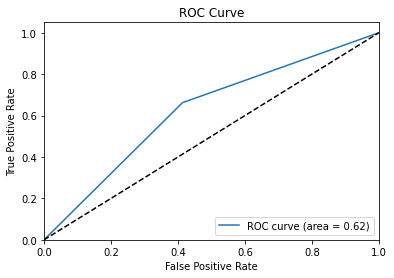

In [ ]:
print("The training performance of the model")
Performance(Model=lr_model,y=y_res,x=x_res)


The testing performance of the model
Accuracy
0.5912
 
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.59      0.70      4558
         1.0       0.26      0.60      0.36      1073

    accuracy                           0.59      5631
   macro avg       0.56      0.59      0.53      5631
weighted avg       0.75      0.59      0.63      5631

 
the AUC is : 0.59


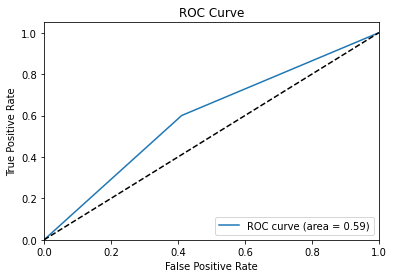

In [ ]:
print("The testing performance of the model")
Performance(Model=lr_model,y=y_test,x=x_test)

In [ ]:
def metrics(Model,y,x):
  
  metrics = pd.DataFrame(index=['accuracy','precision','recall','f1_score'],columns=['LogisticReg'])
  metrics.loc['accuracy','LogisticReg'] = accuracy_score(y,Model.predict(x).round()).round(4)
  metrics.loc['precision','LogisticReg'] = precision_score(y,Model.predict(x).round()).round(4)
  metrics.loc['recall','LogisticReg'] = recall_score(y,Model.predict(x).round()).round(4)
  metrics.loc['f1_score','LogisticReg'] = f1_score(y,Model.predict(x).round()).round(4)

  return metrics

In [ ]:
def ConfusionMatrix(Model,y,x):
  cm = confusion_matrix(y,Model.predict(x).round()).round(4)
  sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
  plt.xlabel('Actual Label')
  plt.ylabel('Predicted Label')
 
  

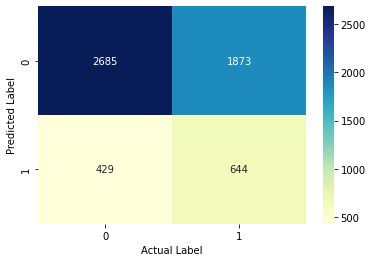

In [ ]:
ConfusionMatrix(Model=lr_model,y=y_test,x=x_test)

In [ ]:
round(100*metrics(Model=lr_model,y=y_test,x=x_test),4)

,LogisticReg
accuracy,59.12
precision,25.59
recall,60.02
f1_score,35.88


###**Decision Tree Classifier**

In [ ]:
dt_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

def build_dt_classifier(grid, cv, y, x):
    dt=DecisionTreeClassifier()
    grid_search = GridSearchCV(dt, grid, n_jobs=-1, cv=cv, verbose=10,scoring='roc_auc')
    grid_search.fit(x,y)
    return grid_search
    
dt_model = build_dt_classifier(dt_grid,5,y_res, x_res)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


The training performance of the model
Accuracy
0.8223
 
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84     10440
         1.0       0.94      0.69      0.80     10440

    accuracy                           0.82     20880
   macro avg       0.85      0.82      0.82     20880
weighted avg       0.85      0.82      0.82     20880

 
the AUC is : 0.82


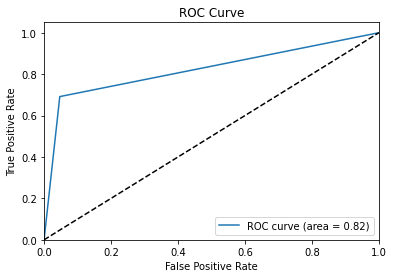

In [ ]:
print("The training performance of the model")
Performance(Model=dt_model,y=y_res,x=x_res)

The testing performance of the model
Accuracy
0.7887
 
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      4558
         1.0       0.35      0.13      0.18      1073

    accuracy                           0.79      5631
   macro avg       0.58      0.54      0.53      5631
weighted avg       0.73      0.79      0.75      5631

 
the AUC is : 0.54


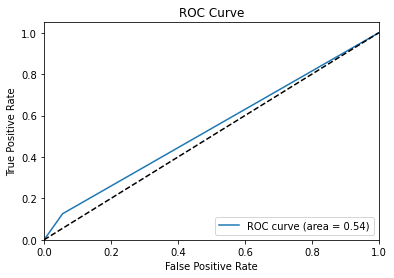

In [ ]:
print("The testing performance of the model")
Performance(Model=dt_model,y=y_test,x=x_test)

In [ ]:
def metricsDT(Model,y,x):
  
  metrics = pd.DataFrame(index=['accuracy','precision','recall','f1_score'],columns=['DecisionTree'])
  metrics.loc['accuracy','DecisionTree'] = accuracy_score(y,Model.predict(x).round()).round(4)
  metrics.loc['precision','DecisionTree'] = precision_score(y,Model.predict(x).round()).round(4)
  metrics.loc['recall','DecisionTree'] = recall_score(y,Model.predict(x).round()).round(4)
  metrics.loc['f1_score','DecisionTree'] = f1_score(y,Model.predict(x).round()).round(4)

  return metrics

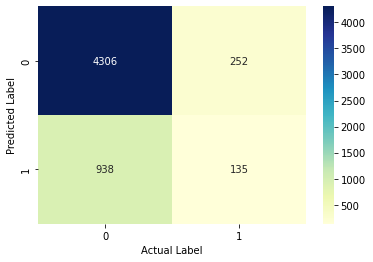

In [ ]:
ConfusionMatrix(Model=dt_model,y=y_test,x=x_test)

In [ ]:
round(100*metricsDT(Model=dt_model,y=y_test,x=x_test),4)

,DecisionTree
accuracy,78.87
precision,34.88
recall,12.58
f1_score,18.49


### **Random Forest**

In [ ]:
def RandomForest(grid, cv, y, x):
    rf=RandomForestClassifier(n_estimators=1000, min_samples_split=10, min_samples_leaf=1,
           max_features='auto', max_leaf_nodes=None,
           oob_score=True, n_jobs=-1, random_state=1)
    grid_search = GridSearchCV(rf, grid, n_jobs=-1, cv=cv, verbose=10, scoring='roc_auc')
    grid_search.fit(x, y)
    return grid_search

In [ ]:
rf_grid = {    
            "n_estimators"      : [50,100,200],
            "max_features"      : ['auto'],
            "max_depth"         : [20,50],
            "min_samples_split" : [0.1,0.15,0.2],
            "class_weight"      : [{1:1.35}],
            "oob_score"         : [True, False],
            "bootstrap"         : [True, False],
            "criterion"         : ["gini"]
}


In [ ]:
rf_model = RandomForest(rf_grid,5,y_res,x_res)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
print("The best paramters")
print(rf_model.best_params_)

The best paramters
{'bootstrap': False, 'class_weight': {1: 1.35}, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 0.1, 'n_estimators': 200, 'oob_score': False}


The training performance of the model
Accuracy
0.8129
 
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81     10440
         1.0       0.80      0.84      0.82     10440

    accuracy                           0.81     20880
   macro avg       0.81      0.81      0.81     20880
weighted avg       0.81      0.81      0.81     20880

 
the AUC is : 0.81


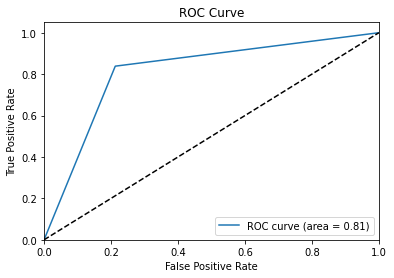

In [ ]:
print("The training performance of the model")
Performance(Model=rf_model,y=y_res,x=x_res)

The testing performance of the model
Accuracy
0.7125
 
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.82      4558
         1.0       0.31      0.41      0.35      1073

    accuracy                           0.71      5631
   macro avg       0.58      0.60      0.58      5631
weighted avg       0.75      0.71      0.73      5631

 
the AUC is : 0.60


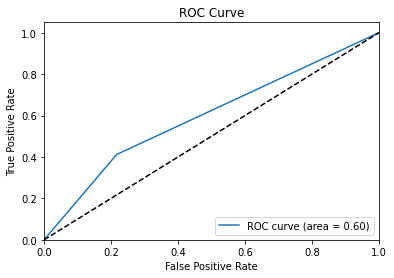

In [ ]:
print("The testing performance of the model")
Performance(Model=rf_model,y=y_test,x=x_test)

In [ ]:
def metricsRF(Model,y,x):
  
  metrics = pd.DataFrame(index=['accuracy','precision','recall','f1_score'],columns=['RandomForest'])
  metrics.loc['accuracy','RandomForest'] = accuracy_score(y,Model.predict(x).round()).round(4)
  metrics.loc['precision','RandomForest'] = precision_score(y,Model.predict(x).round()).round(4)
  metrics.loc['recall','RandomForest'] = recall_score(y,Model.predict(x).round()).round(4)
  metrics.loc['f1_score','RandomForest'] = f1_score(y,Model.predict(x).round()).round(4)

  return metrics

In [ ]:
def ConfusionMatrix(Model,y,x):
  cm = confusion_matrix(y,Model.predict(x).round()).round(4)
  
  sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
  plt.xlabel('Actual Label')
  plt.ylabel('Predicted Label')
  

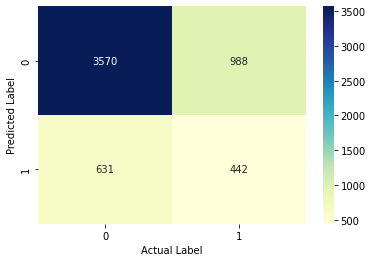

In [ ]:
ConfusionMatrix(Model=rf_model,y=y_test,x=x_test)

In [ ]:
round(100*metricsRF(Model=rf_model,y=y_test,x=x_test),4)

,RandomForest
accuracy,71.25
precision,30.91
recall,41.19
f1_score,35.32


###**XGBClassifier**

In [ ]:
def XGBoost(grid, cv, y, x):
    xgb=XGBClassifier(objective='binary:logistic',
                    silent=True, nthread=1)
    grid_search = GridSearchCV(xgb, grid, n_jobs=-1, cv=cv, verbose=10, scoring='roc_auc')
    grid_search.fit(y,x)
    return grid_search

In [ ]:
xgb_grid = {'colsample_bytree': [0.8],
            'eval_metric': ['auc'], 
            'gamma':[ 0.5], 
            'learning_rate': [0.05], 
            'max_depth': [10], 
            'min_child_weight': [5], 
            'n_estimators': [100], 
            'scale_pos_weight':[ 3], 
            'subsample': [0.8]}

In [ ]:
xgb_model = XGBoost(xgb_grid,5,x_res,y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


The training performance of the model
Accuracy
0.9354
 
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93     10440
         1.0       0.90      0.98      0.94     10440

    accuracy                           0.94     20880
   macro avg       0.94      0.94      0.94     20880
weighted avg       0.94      0.94      0.94     20880

 
the AUC is : 0.94


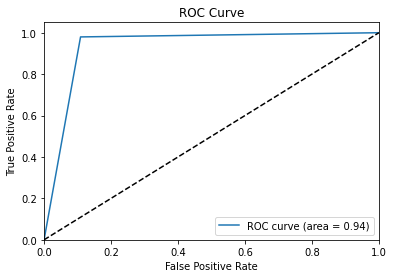

In [ ]:
print("The training performance of the model")
Performance(Model=xgb_model,y=y_res,x=x_res)

The testing performance of the model
Accuracy
0.7342
 
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      4558
         1.0       0.34      0.40      0.37      1073

    accuracy                           0.73      5631
   macro avg       0.59      0.61      0.60      5631
weighted avg       0.75      0.73      0.74      5631

 
the AUC is : 0.61


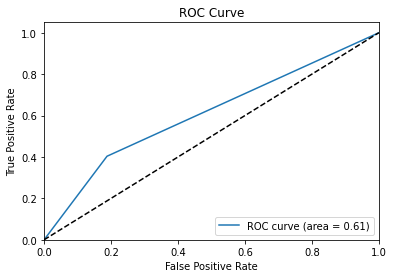

In [ ]:
print("The testing performance of the model")
Performance(Model=xgb_model,y=y_test,x=x_test)

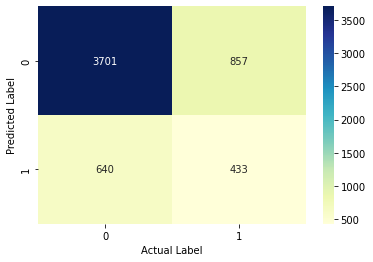

In [ ]:
ConfusionMatrix(Model=xgb_model,y=y_test,x=x_test)

In [ ]:
def metricsXGB(Model,y,x):
  
  metrics = pd.DataFrame(index=['accuracy','precision','recall','f1_score'],columns=['XGB'])
  metrics.loc['accuracy','XGB'] = accuracy_score(y,Model.predict(x).round()).round(4)
  metrics.loc['precision','XGB'] = precision_score(y,Model.predict(x).round()).round(4)
  metrics.loc['recall','XGB'] = recall_score(y,Model.predict(x).round()).round(4)
  metrics.loc['f1_score','XGB'] = f1_score(y,Model.predict(x).round()).round(4)

  return metrics

In [ ]:
100*metricsXGB(Model=xgb_model,y=y_test,x=x_test)

,XGB
accuracy,73.42
precision,33.57
recall,40.35
f1_score,36.65
